# Complete Workflow: Scripts and R-statistic Analysis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/CMBSciPol/furax-compsep-paper/blob/main/notebooks/04_Scripts_and_Analysis_Workflow.ipynb)

## Learning Objectives

By the end of this notebook, you will:
- Install the furax-cs package and dependencies
- Generate and cache frequency maps for component separation
- Run K-means component separation with different cluster configurations
- Perform r-statistic analysis to estimate the tensor-to-scalar ratio
- Understand the complete pipeline from data generation to scientific analysis

## The Complete Pipeline

This notebook demonstrates the end-to-end workflow for CMB component separation research:

1. **Installation**: Set up the furax-cs package
2. **Data Generation**: Create and cache frequency maps
3. **Component Separation**: Run experiments with different configurations
4. **Statistical Analysis**: Compute r-statistic and visualize results

This workflow is designed to be scalable from interactive notebooks to HPC cluster execution.

## Step 1: Installation

First, install the `furax-cs` package which provides all the tools needed for CMB component separation analysis.

The package includes:
- Command-line tools for component separation (`kmeans-model`, `ptep-model`, etc.)
- Data generation utilities (`generate_data`)
- Analysis and visualization tools (`r_analysis`)

In [1]:
!pip install -q furax-cs

## Step 2: Generate Frequency Maps

Before running component separation experiments, we need to generate simulated sky maps at multiple frequencies.

### Why Pre-generate Maps?

- **HPC Compatibility**: Many supercomputers lack internet access, so maps must be cached
- **Performance**: Generating maps once and reusing them is much faster
- **Reproducibility**: Ensures all experiments use identical input data

### What Gets Generated?

The `generate_data` command creates:
- Multi-frequency CMB + foreground maps (dust + synchrotron)
- Instrumental noise realizations for LiteBIRD bands
- Maps at multiple resolutions (nside: 4, 8, 32, 64, 128)
- Cached as `.pkl` files in `freq_maps_cache/`

In [2]:
!generate_data --nside 64 --no-noise --instrument LiteBIRD --sky c1d1s1

Generated and saved freq_maps for nside 64.
Generating fg map for nside 64, noise False, instrument LiteBIRD
Generated and saved freq_maps for nside 64.
Generating CMB map for nside 64, sky c1d1s1
Generated and saved freq_maps for nside 64 and for tag c1.


## Step 3: Run K-means Component Separation

Now we'll run the adaptive K-means component separation method with **two different cluster configurations** to compare their performance.

### Understanding the Parameters

```bash
kmeans-model -n 64 -pc 10000 500 500 -tag c1d1s1 -m GAL020 -i LiteBIRD -ns 5 -nr 0.2 -mi 100
```

- **`-n 64`**: HEALPix resolution (nside=64 → ~55 arcmin pixels)
- **`-pc 10000 500 500`**: Cluster counts for [beta_dust, temp_dust, beta_pl]
  - `10000` clusters for dust spectral index (high spatial variation)
  - `500` clusters for dust temperature (moderate variation)
  - `500` clusters for synchrotron index (low variation)
- **`-tag c1d1s1`**: Sky model (CMB + dust + synchrotron)
- **`-m GAL020`**: Galactic mask (cleanest 20% of sky)
- **`-i LiteBIRD`**: Instrument configuration (15 frequency bands)
- **`-ns 5`**: 5 noise simulations for Monte Carlo analysis
- **`-nr 0.2`**: Noise level at 20% of nominal
- **`-mi 100`**: Maximum 100 L-BFGS optimizer iterations


### Run 1: 10000 Clusters for Dust Spectral Index

In [4]:
!kmeans-model -n 64 -pc 10000 500 500 -tag c1d1s1 -m GAL020 -i LiteBIRD -ns 5 -nr 0.2 -mi 100
!kmeans-model -n 64 -pc 10000 500 500 -tag c1d1s1 -m GAL040 -i LiteBIRD -ns 5 -nr 0.2 -mi 100
!kmeans-model -n 64 -pc 10000 500 500 -tag c1d1s1 -m GAL060 -i LiteBIRD -ns 5 -nr 0.2 -mi 100

Loaded freq_maps for nside 64 from cache.
Loaded freq_maps for nside 64 from cache.
Loaded freq_maps for nside 64 from cache.
Loaded freq_maps for nside 64 from cache.
Running 0... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 0... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 1... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 0... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 1... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 2... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 0... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 1... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 2... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 3... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 0... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running

### Run 2: 8000 Clusters for Dust Spectral Index

In [5]:
!kmeans-model -n 64 -pc 8000 500 500 -tag c1d1s1 -m GAL020 -i LiteBIRD -ns 5 -nr 0.2 -mi 100
!kmeans-model -n 64 -pc 8000 500 500 -tag c1d1s1 -m GAL040 -i LiteBIRD -ns 5 -nr 0.2 -mi 100
!kmeans-model -n 64 -pc 8000 500 500 -tag c1d1s1 -m GAL060 -i LiteBIRD -ns 5 -nr 0.2 -mi 100

Loaded freq_maps for nside 64 from cache.
Loaded freq_maps for nside 64 from cache.
Loaded freq_maps for nside 64 from cache.
Loaded freq_maps for nside 64 from cache.
Running 0... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 0... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 1... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 0... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 1... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 2... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 0... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 1... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 2... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 3... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running 0... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:00 -:--:--
Running

## Step 4: Organize Results

The component separation scripts save results to the `results/` directory with automatic naming based on the configuration.

### Result Folder Structure

Each run creates a folder like: `kmeans_BD10000_TD500_BS500_c1d1s1_LiteBIRD_GAL020_noise/`

Where:
- `BD10000`: 10000 clusters for Beta Dust
- `TD500`: 500 clusters for Temperature Dust
- `BS500`: 500 clusters for Beta Synchrotron

### Contents of Each Result Folder

- **`results.npz`**: Complete optimization results
  - CMB reconstruction for each noise realization
  - Optimized spectral parameters
  - Optimization history (updates, negative log-likelihood)
  - Cluster assignments
- **`best_params.npz`**: Ground truth and input maps
  - True CMB map (`I_CMB`)
  - Foreground-only maps (`I_D_NOCMB`)
- **`mask.npy`**: Sky mask used for analysis

Let's move results to a dedicated folder for this tutorial:

In [6]:
!mkdir results_tutorial
!mv kmeans* results_tutorial/

## Step 5: R-statistic Analysis

Now we perform statistical analysis to estimate the tensor-to-scalar ratio **r** and compare the two configurations.

### What is the R-statistic?

The tensor-to-scalar ratio **r** parameterizes the amplitude of primordial gravitational waves relative to scalar (density) perturbations. It's a key observable in CMB B-mode polarization studies:

- **r = 0**: No primordial gravitational waves
- **r > 0**: Evidence for inflation-generated gravitational waves
- Current upper limit: r < 0.036 (95% CL, Planck + BICEP/Keck)

### The R-statistic Pipeline

The `r_analysis` tool has two main subcommands:

1. **`r_analysis snap`**: Compute statistics and save to a snapshot file
2. **`r_analysis plot`**: Generate visualizations from results or snapshots

### Step 5a: Compute and Cache Statistics

First, we compute all statistics and save them to a snapshot file for fast reuse:

```bash
r_analysis snap -r kmeans_BD10000 kmeans_BD8000 -ird results_tutorial/ -mi 100 -o snapshot.pkl
```

- **`snap`**: Subcommand to compute and save statistics
- **`-r kmeans_BD10000 kmeans_BD8000`**: Filter keywords to match result folders
- **`-ird results_tutorial/`**: Input results directory
- **`-mi 100`**: Maximum 100 iterations for systematic residual computation
- **`-o snapshot.pkl`**: Output snapshot file

### Step 5b: Generate Plots

Then, generate plots using the cached snapshot:

```bash
r_analysis plot -r kmeans_BD10000 kmeans_BD8000 -t "10000 Clusters" "8000 Clusters" -ird results_tutorial/ -a --output-format png --snapshot snapshot.pkl
```

- **`plot`**: Subcommand to generate visualizations
- **`-t "10000 Clusters" "8000 Clusters"`**: Plot labels (must match number of `-r` entries)
- **`-a`**: Plot all available visualizations
- **`--output-format png`**: Save plots as PNG files
- **`--snapshot snapshot.pkl`**: Load pre-computed statistics from snapshot

In [ ]:
!r_analysis snap -r kmeans_BD10000 kmeans_BD8000 -ird results_tutorial/ -mi 100 -o snapshot.pkl

In [ ]:
!r_analysis plot -r kmeans_BD10000 kmeans_BD8000 -t "10000 Clusters" "8000 Clusters" -ird results_tutorial/ -a --output-format png --snapshot snapshot.pkl

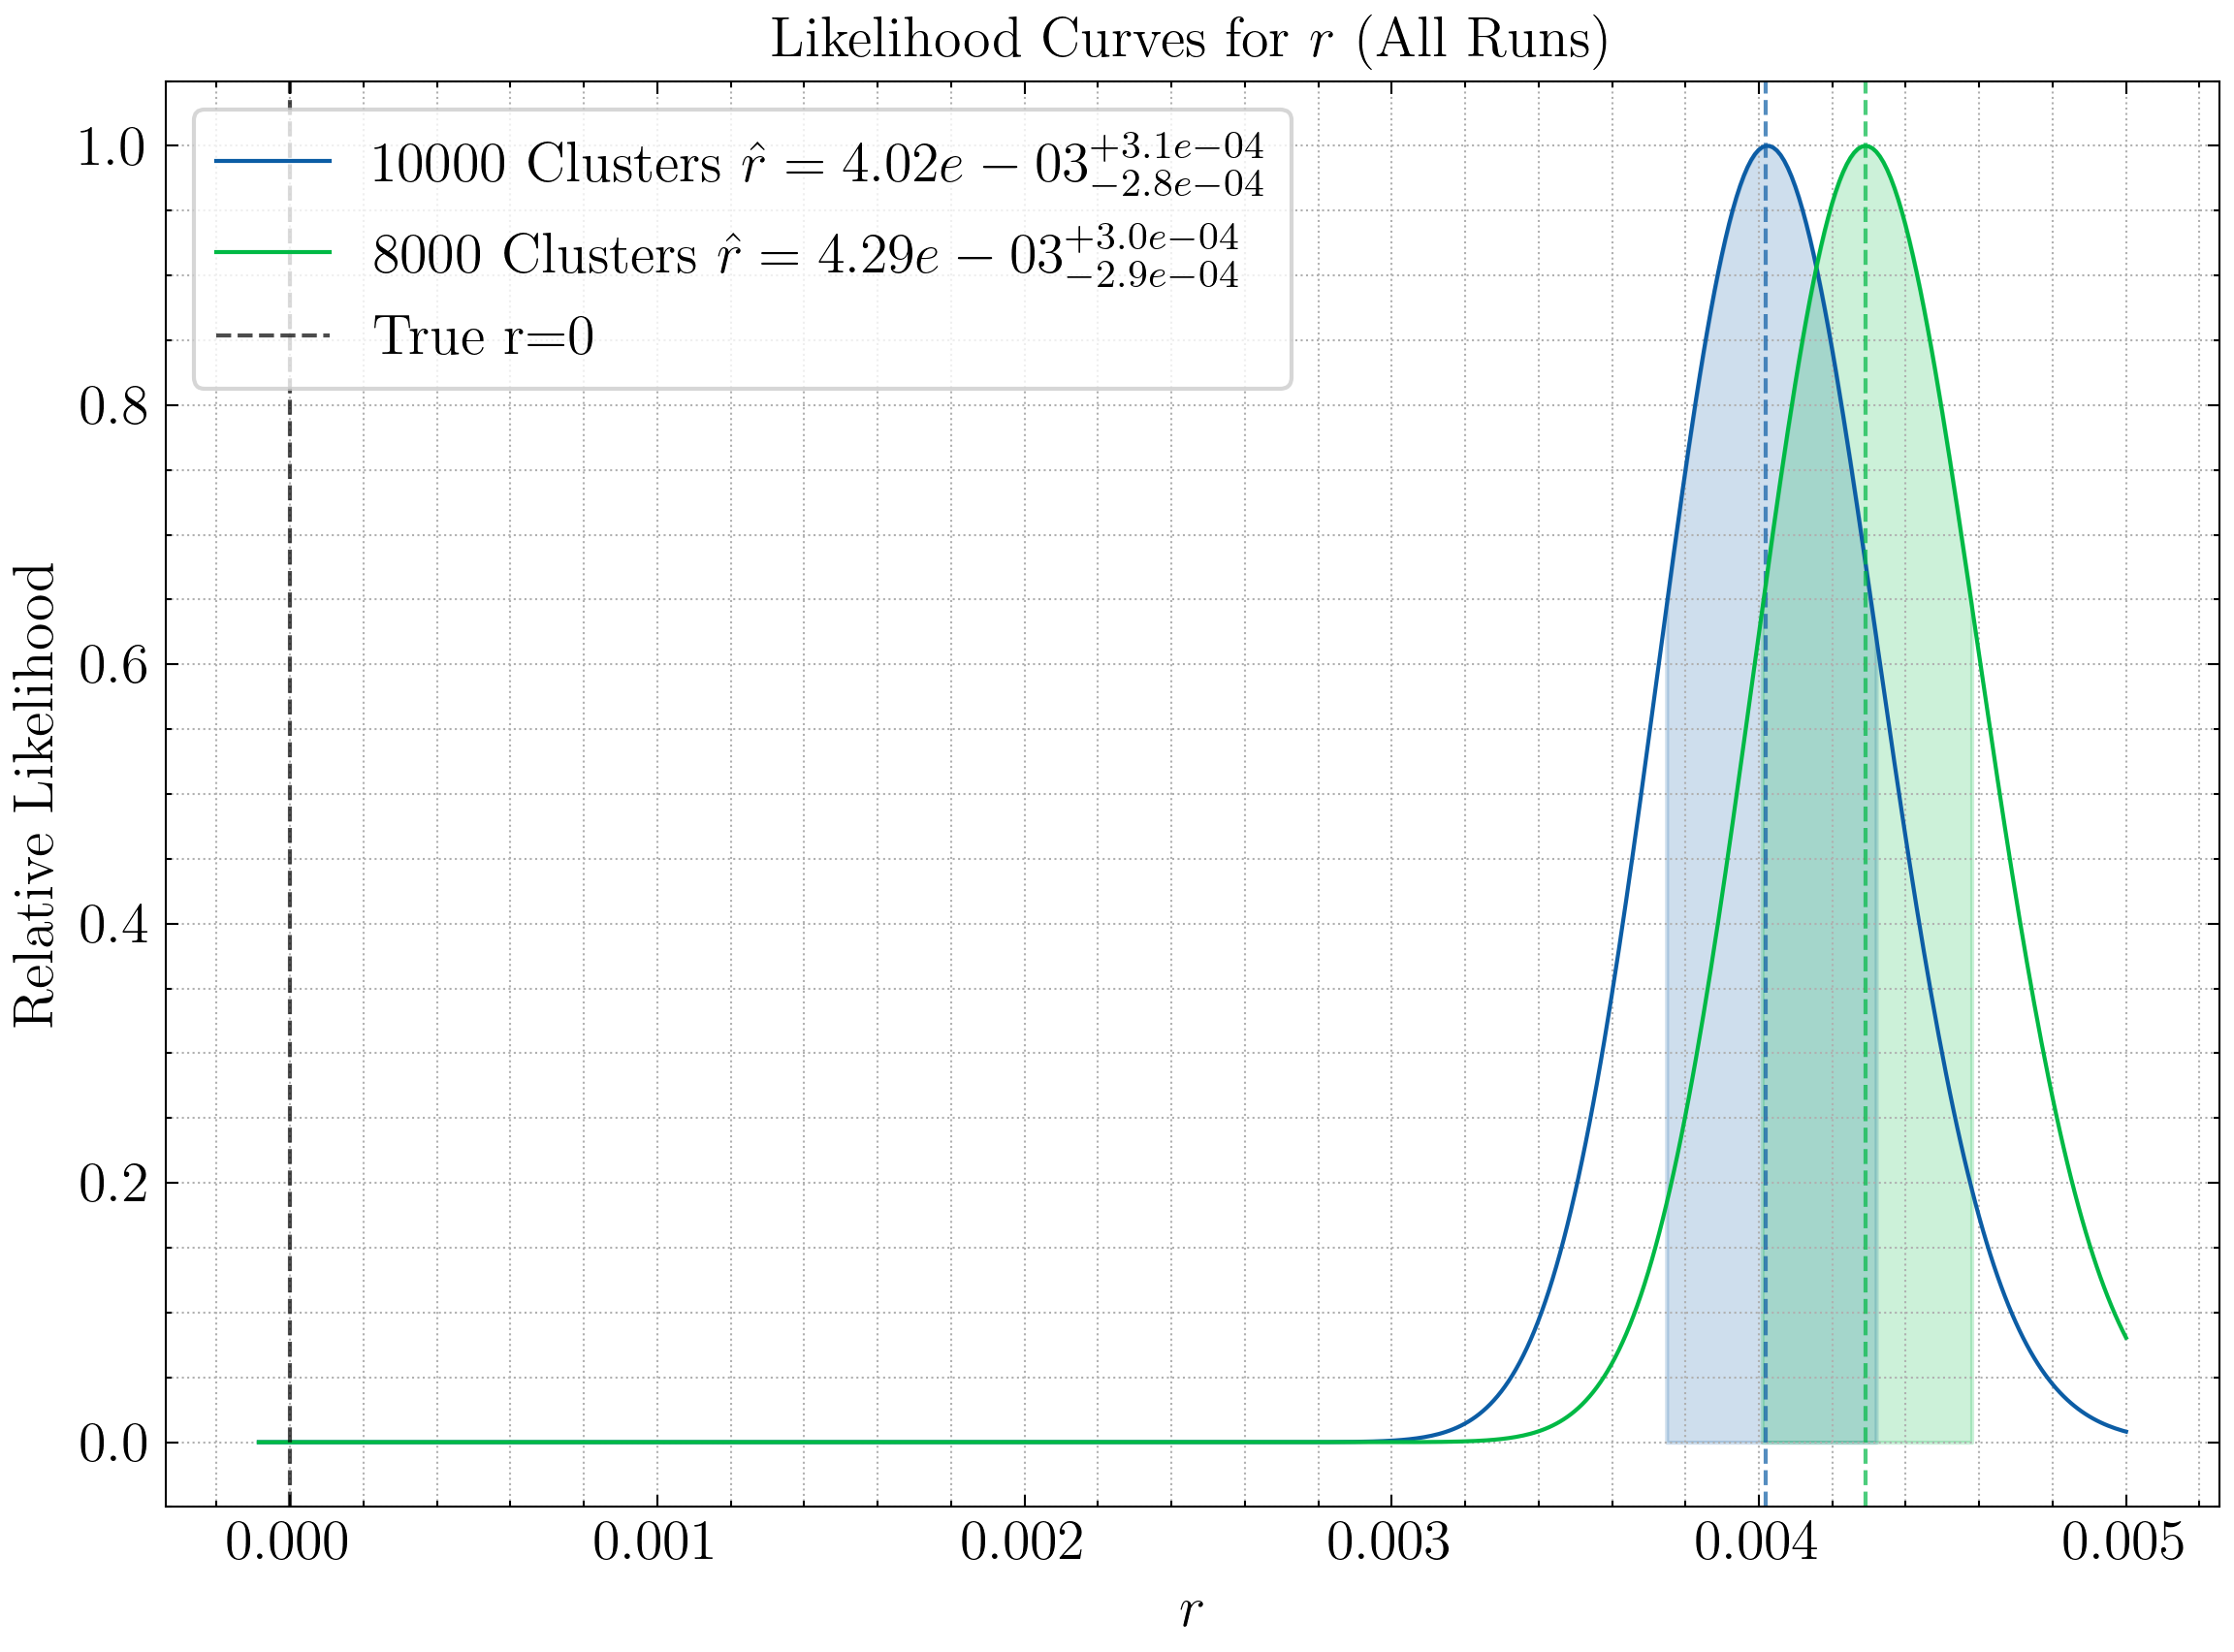

In [3]:
# show image notebooks/plots/r_likelihood_10000 Clusters_8000 Clusters.png
import IPython.display as display

display.Image("plots/r_likelihood_10000 Clusters_8000 Clusters.png")

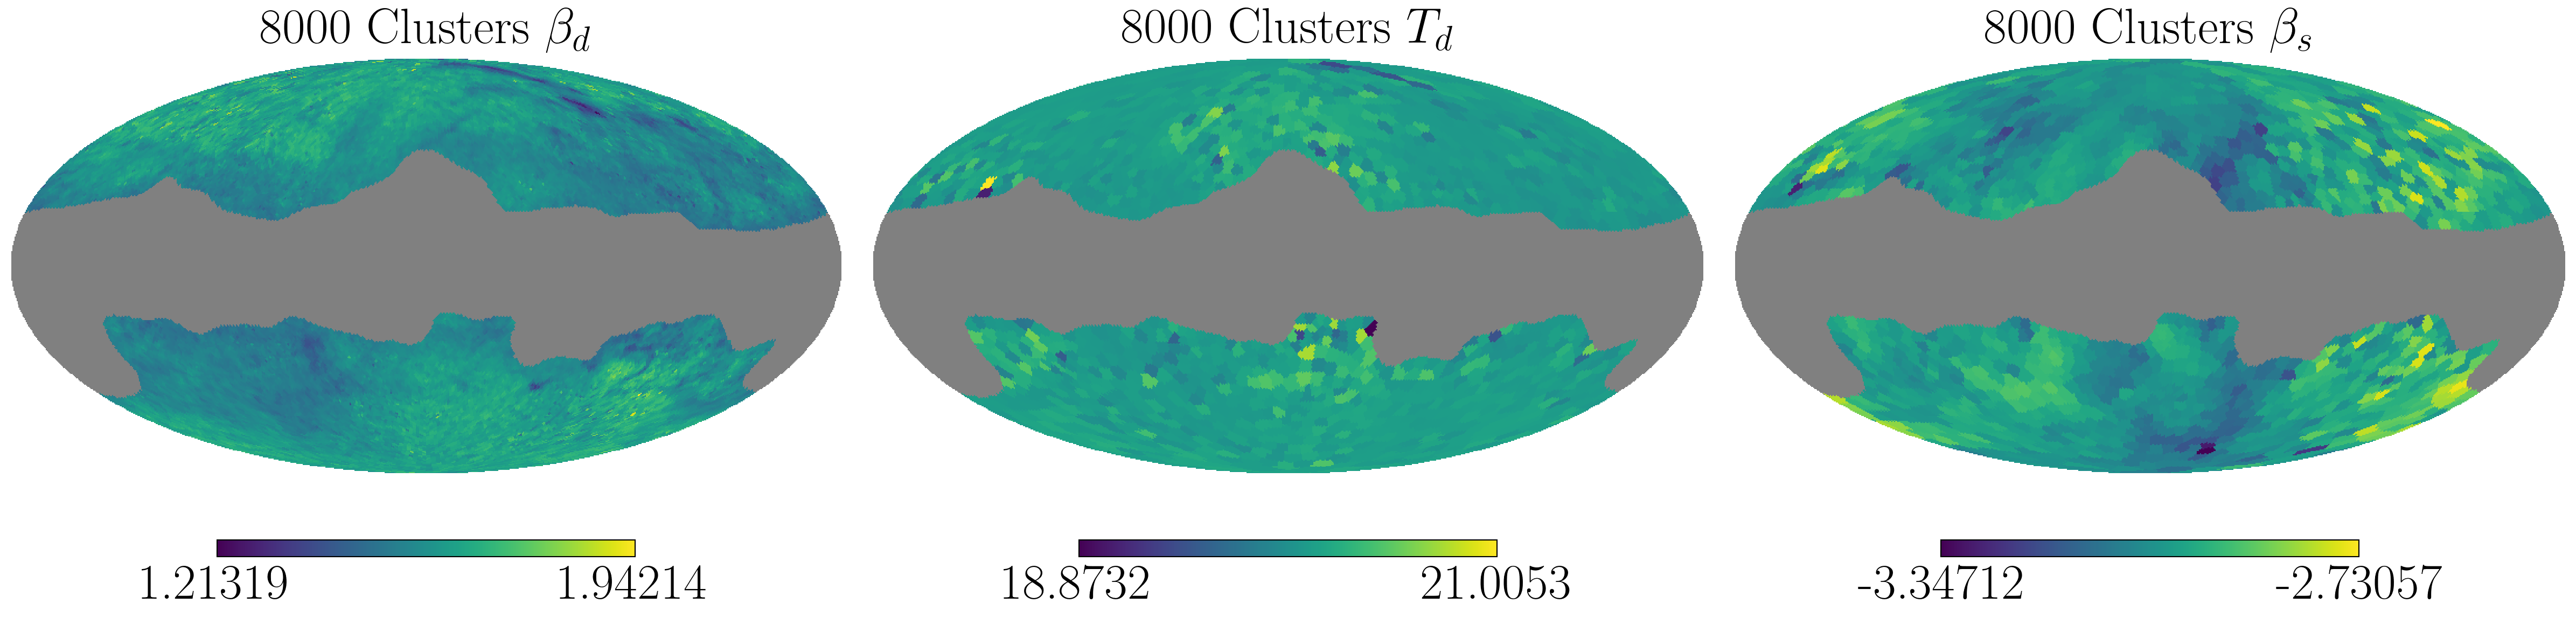

In [5]:
display.Image("plots/params_8000 Clusters.png")

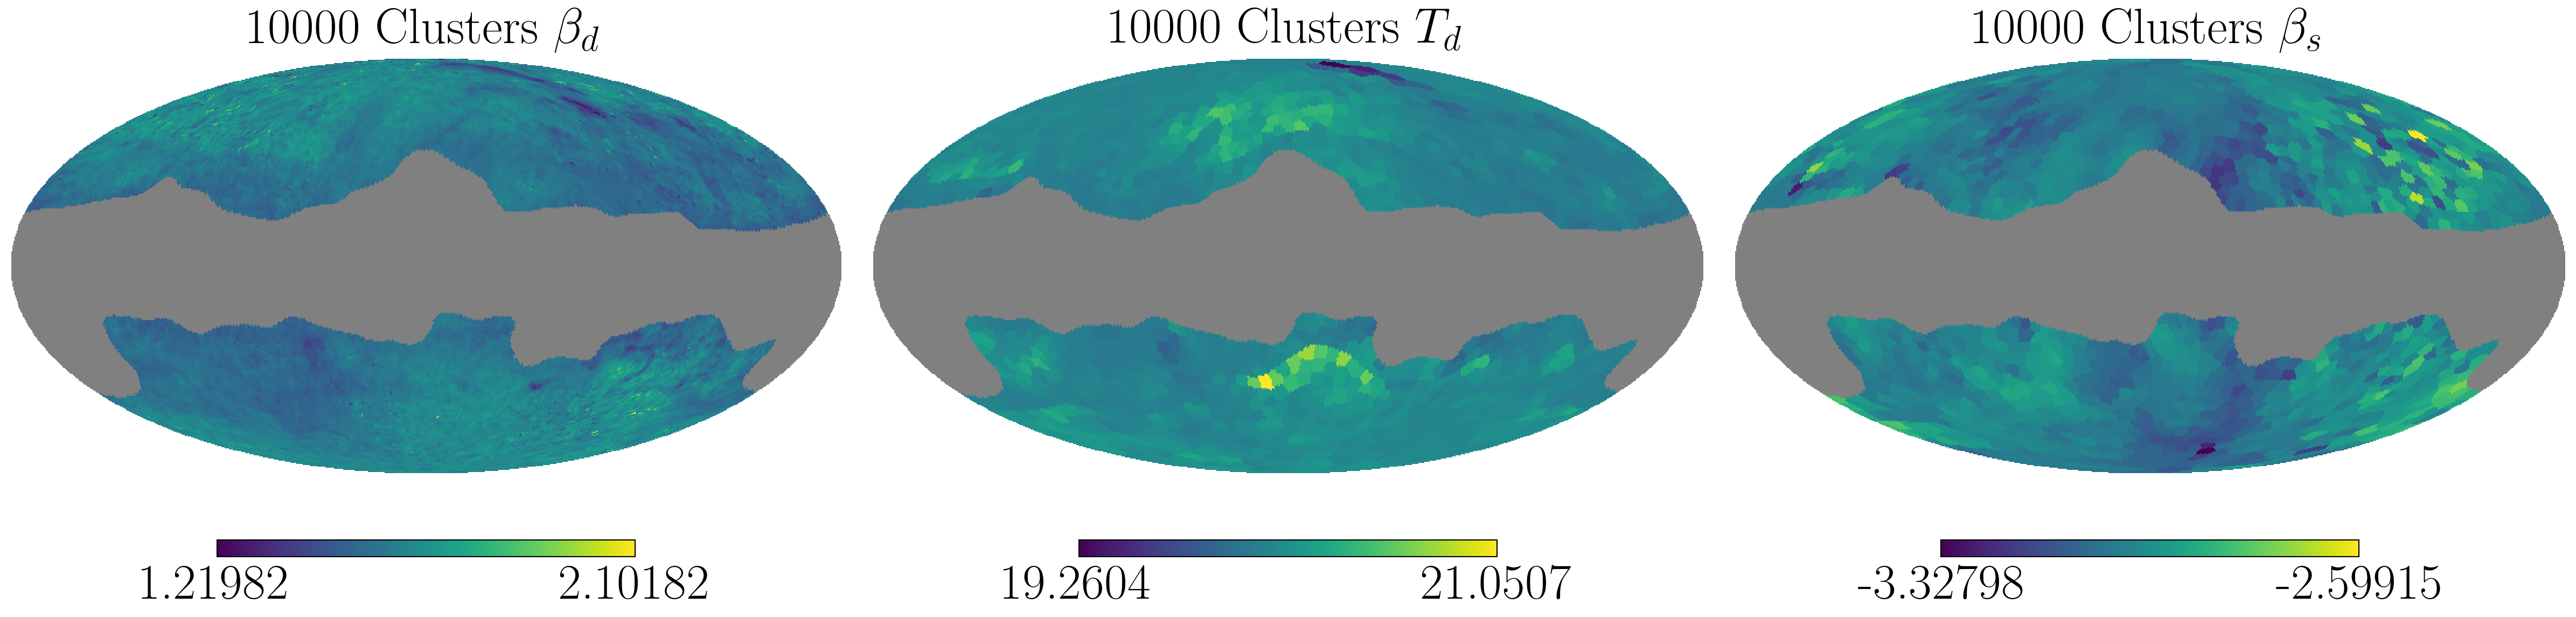

In [6]:
display.Image("plots/params_10000 Clusters.png")

## Understanding the r_analysis Tool

The `r_analysis` command-line tool is a comprehensive analysis pipeline for CMB component separation results.

### Subcommands

The tool provides four main subcommands:

| Subcommand | Purpose |
|------------|---------|
| `snap` | Compute all statistics and save to a snapshot file |
| `plot` | Generate visualizations from results or snapshots |
| `validate` | Run NLL validation checks |
| `estimate` | Estimate tensor-to-scalar ratio r from spectra or maps |

### Core Functionality

**Inputs:**
- `results.npz`: CMB reconstructions, optimized parameters, optimization history
- `best_params.npz`: True CMB map, foreground maps
- `mask.npy`: Sky coverage mask

**Outputs:**
- Statistical analysis plots
- R-statistic estimates with uncertainties
- Residual maps and power spectra
- Variance metrics

### Key Computations

#### 1. Systematic Residuals
Foreground leakage due to imperfect spectral parameter estimation:
$$
\mathbf{s}_{\mathrm{syst}} = \mathbf{W} \mathbf{d}_{\mathrm{fg}}
$$
where $\mathbf{W}$ is the Wiener filter and $\mathbf{d}_{\mathrm{fg}}$ are foreground-only maps.

#### 2. Statistical Residuals
Noise propagation through the component separation:
$$
\mathbf{s}_{\mathrm{stat}} = \mathbf{s}_{\mathrm{recon}} - \mathbf{s}_{\mathrm{true}} - \mathbf{s}_{\mathrm{syst}}
$$

#### 3. Total Residuals
Combined systematic and statistical contributions:
$$
\mathbf{s}_{\mathrm{total}} = \mathbf{s}_{\mathrm{recon}} - \mathbf{s}_{\mathrm{true}}
$$

#### 4. R-statistic Estimation
Maximum likelihood fit to the observed BB power spectrum:
$$
C_\ell^{BB,\mathrm{obs}} = r \cdot C_\ell^{BB,r=1} + C_\ell^{BB,\mathrm{lens}} + C_\ell^{BB,\mathrm{res}}
$$

### Snap Subcommand

Compute statistics and save to a snapshot file:
```bash
r_analysis snap -r run1 run2 -ird results/ -mi 100 -o snapshot.pkl
```

**Required arguments:**
- `-r`: Run name keywords to filter result folders
- `-ird`: Input results directory
- `-o`: Output snapshot file path

**Optional arguments:**
- `-mi`: Max iterations for computing systematics (default: 100)
- `-s`: Solver for optimization (default: optax_lbfgs_zoom)
- `-n`: HEALPix nside (auto-detected if not specified)
- `-i`: Instrument configuration (LiteBIRD, Planck, default)

### Plot Subcommand

Generate visualizations from results or snapshots:
```bash
r_analysis plot -r run1 run2 -t "Title1" "Title2" -ird results/ -a --snapshot snapshot.pkl
```

#### Single-Run Plots
- **`-pc`**: CMB Q/U reconstructions
- **`-pp`**: Spectral parameter maps (beta_dust, temp_dust, beta_pl)
- **`-pt`**: Cluster/patch assignments
- **`-ps`**: BB power spectra (observed, residuals, theory)
- **`-pr`**: R-statistic likelihood curve
- **`-psm`**: Systematic residual Q/U maps
- **`-ptm`**: Statistical residual Q/U maps
- **`-pv`**: Optimization convergence curves

#### Multi-Run Comparison Plots
- **`-ac`**: All CMB reconstructions (mosaic)
- **`-as`**: All BB spectra overlaid
- **`-ar`**: All r-statistic likelihoods
- **`-am`**: Metric distributions (variance, NLL, sum Cl_BB)
- **`-asm`**: All systematic residual maps
- **`-atm`**: All statistical residual maps

#### Analysis Plots (Require Multiple Runs)
- **`-arc`**: R-statistic vs number of clusters
- **`-avc`**: Variance vs number of clusters
- **`-arv`**: R-statistic vs variance

#### Special Flags
- **`-pi`**: Generate publication-quality illustration plots
- **`-a`**: Plot all available visualizations

### Filter System

The `-r` parameter uses keyword matching to select result folders:
```bash
-r kmeans_BD1000  # Matches "kmeans_BD1000_TD50_BS10_..."
-r PTEP GAL020    # Matches folders with both "PTEP" AND "GAL020"
```

### Snapshot Workflow

The recommended workflow is:
1. **First run**: Use `snap` to compute all statistics and save to a file
2. **Subsequent runs**: Use `plot` with `--snapshot` to load cached data (much faster)

This is useful for iterating on plot styles without recomputing expensive statistics.

### Output Format Control

- **`--output-format png`**: Save plots as PNG files (default, 300 dpi)
- **`--output-format pdf`**: Save plots as PDF files (vector graphics)
- **`--output-format show`**: Display plots inline without saving (notebooks)

## Interpreting the Results

### R vs Clusters Plot

The `-arc` flag produces a key diagnostic plot showing:
- **X-axis**: Total number of clusters (summed across all parameters)
- **Y-axis**: Estimated r-statistic value
- **Error bars**: 1σ uncertainties (asymmetric)
- **Color**: Individual runs/configurations

**What to look for:**
1. **Convergence**: Does r stabilize as clusters increase?
2. **Bias**: Is r systematically offset from zero (or true value)?
3. **Uncertainty**: Do error bars shrink with more clusters?
4. **Optimal point**: Where does complexity vs accuracy trade-off peak?

### Expected Behavior

For this noise-free (or low-noise) simulation:
- r should be close to 0 (no primordial GW signal in input)
- More clusters → better foreground modeling → smaller |r|
- Statistical uncertainties dominated by lensing B-modes

### Variance as a Quality Proxy

CMB reconstruction variance correlates with foreground removal quality:
- Lower variance → cleaner CMB extraction
- Can be used as a fast proxy for r-statistic performance
- Enables grid search optimization without full r computation